In [1]:
import sys
sys.path.append("../../OneFormer/")

In [2]:
from script.load_model import load_pytroch_model, load_tensorflow_model
from skimage.io import imread, imsave
from script.generator import SlideWindowPredictor
from tqdm import trange
import sys
sys.path.append("/home/wlli/project_in_wd/deepYeast/deeplab/")
from postprocess.post_process_utils import post_process_panoptic

In [20]:
predictor_pytorch = load_pytroch_model()

In [3]:
predictor_tensor = load_tensorflow_model()

2024-10-25 15:41:16.991458: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-25 15:41:18.136899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-25 15:41:18.146061: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


/home/wlli/Data/deepyeast_model/v_1.0.0/checkpoint/
restoring or initializing model...
restored model from /home/wlli/Data/deepyeast_model/v_1.0.0/checkpoint/ckpt-100000.
restored from checkpoint: /home/wlli/Data/deepyeast_model/v_1.0.0/checkpoint/ckpt-100000


In [5]:
slide_predictor = SlideWindowPredictor(predictor_tensor, crop_size=513, overlap_ratio=0.5)

In [49]:
segment_movie = np.zeros((movie.shape[0], movie.shape[1], movie.shape[2]), dtype=np.uint16)
for frame in trange(4, 6):
    segment_frame = predictor_tensor.predict(movie[frame,:,:,3])
    segment_frame = segment_frame["panoptic_pred"][0].numpy()
    segment_frame = post_process_panoptic(segment_frame,
                                       expand_disk=7,
                                       clean_border_region=True,
                                       area_threshold=100)
    # segment_frame = slide_predictor.generate_masks()
    segment_movie[frame] = segment_frame
imsave(filename[:-4]+"_mask.tif", segment_movie)

data/20231025-timelapse_JCS0424_01-4ch-crop.tif


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:21<00:00, 10.76s/it]
/tmp/ipykernel_4189034/898197133.py:14: UserWarning: data/20231025-timelapse_JCS0424_01-4ch-crop_mask.tif is a low contrast image
  imsave(filename[:-4]+"_mask.tif", segment_movie)


In [4]:
import matplotlib.pyplot as plt
from pathlib import Path

In [9]:
movie_path_list = list(Path("/home/wlli/Data/raw/julia_test/").rglob("*.tif"))
movie_path_list


[PosixPath('/home/wlli/Data/raw/julia_test/20231025-timelapse_JCS0424_01-2.tif'),
 PosixPath('/home/wlli/Data/raw/julia_test/20231025-timelapse_JCS0424_01-1.tif'),
 PosixPath('/home/wlli/Data/raw/julia_test/testtif.tif'),
 PosixPath('/home/wlli/Data/raw/julia_test/20231025-timelapse_JCS0424_01-3.tif')]

In [41]:
movie = imread(movie_path_list[1])

In [42]:
t = 15
segment_frame = predictor_tensor.predict(movie[t,:,:,3])
segment_frame = segment_frame["panoptic_pred"][0].numpy()
post = post_process_panoptic(segment_frame,
                                   expand_disk=7,
                                   clean_border_region=True,
                                   area_threshold=100)

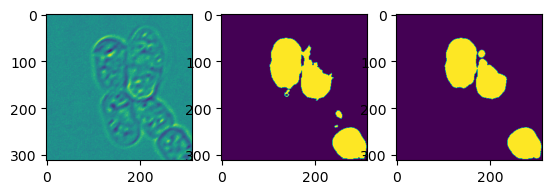

In [43]:
fig, ax = plt.subplots(1,3)
ax[0].imshow(movie[t,:,:,3])
ax[1].imshow(segment_frame)
ax[2].imshow(post)